#### Table of Contents <a id='toc'></a>

### [Introduction](#intro)
### [Business & Data Understanding](#bdu)
### [Prepare Data](#prepare_data)
### [Data Modelling](#data_modelling)
### [Evaluation](#evaluation)

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Introduction <a id='intro'></a>
[back](#toc)

The data for this project is from a kaggle competition for predicting the result of one round of online game PLAYERUNKNOWN'S BATTLEGROUND (PUBG): https://www.kaggle.com/c/pubg-finish-placement-prediction/overview. PUBG is a multiplayer battle royal online game. The player lands with about 100 others on an island and has to fight against the others. The required items such as weapons or medical equipment must be collected by the players themselves. The game area becomes smaller during the game, which forces an encounter with the other players. There exists three different game modes: solo, duo and squad. In duo (2 players per group) and squad (3 or 4 players per group) mode, it is possible to revive the own teammates. All modes are available in third-person or first-person (fpp).

##### HELPFUL --> Delete after finising:
https://www.kaggle.com/sdip28/pubg-exploratory-data-analysis-prediction

### Business & Data Understanding <a id='bdu'></a>
[back](#toc)

In [2]:
train = pd.read_csv('pubg_train.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
for column in train.columns:
    print(column)
    print(train[column].describe())
    print('________________________')

Id
count            4446966
unique           4446966
top       2962675a8b021b
freq                   1
Name: Id, dtype: object
________________________
groupId
count            4446966
unique           2026745
top       14d6b54cdec6bc
freq                  74
Name: groupId, dtype: object
________________________
matchId
count            4446966
unique             47965
top       dae82781864ce8
freq                 100
Name: matchId, dtype: object
________________________
assists
count    4.446966e+06
mean     2.338149e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64
________________________
boosts
count    4.446966e+06
mean     1.106908e+00
std      1.715794e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.300000e+01
Name: boosts, dtype: float64
________________________
damageDealt
count    4.446966e+06
mean     1.307

### Single Variable plots

In [6]:
matchtypes = train.matchType.value_counts()

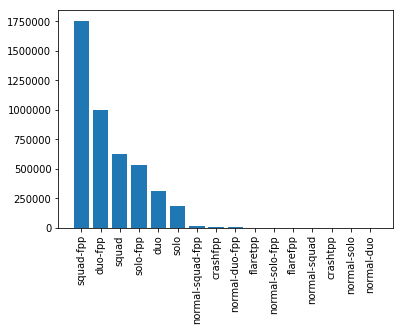

In [7]:
plt.bar(matchtypes.index, matchtypes, width=0.8)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

#### Kills, kills, kills

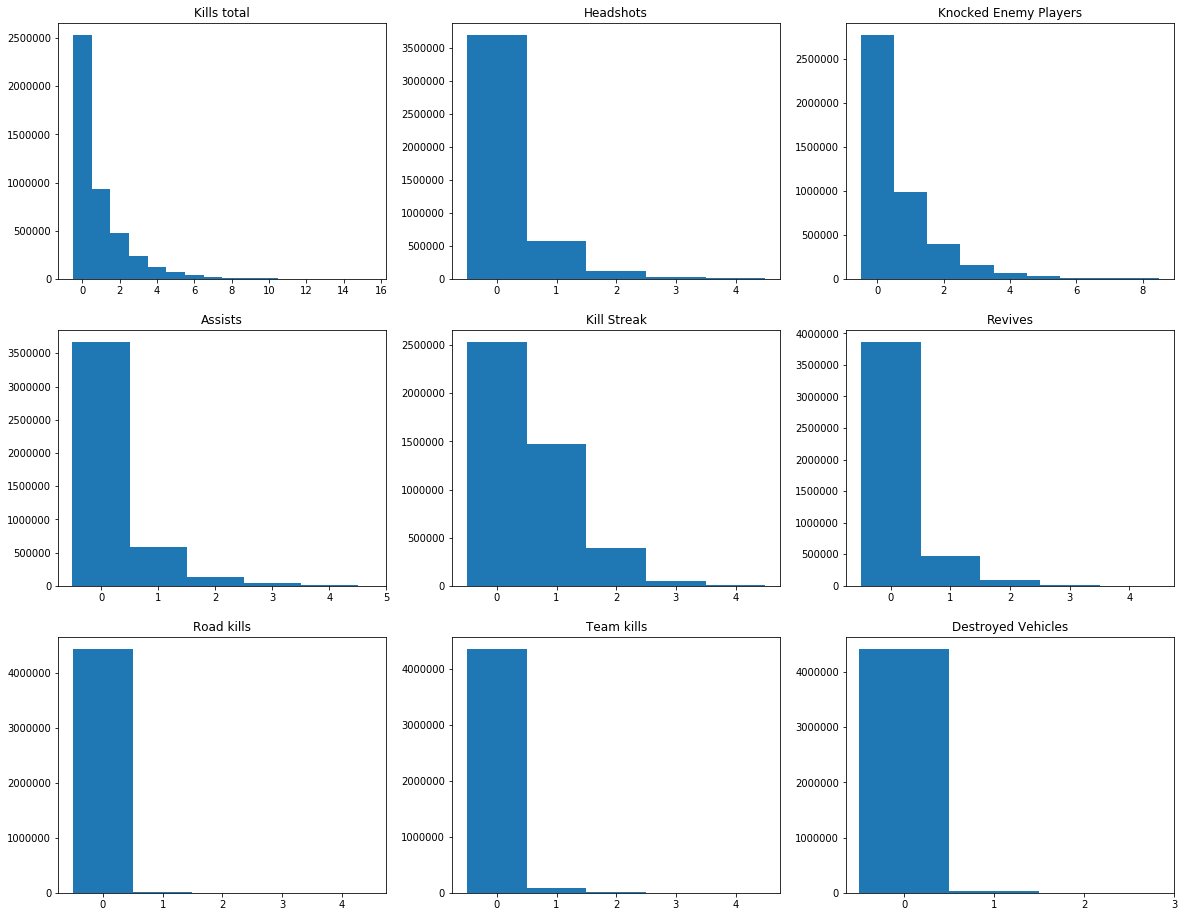

In [8]:
fig1, axs1 = plt.subplots(3, 3, figsize=(20,16))

#kills
axs1[0,0].hist(train.kills, 
              bins=range(0, 17), 
              align='left')
axs1[0,0].set_title('Kills total')

#headshots
axs1[0,1].hist(train.headshotKills, 
              bins=range(0, 6), 
              align='left')
axs1[0,1].set_title('Headshots')

#knocked enemies
axs1[0,2].hist(train.DBNOs, 
              bins=range(0, 10), 
              align='left')
axs1[0,2].set_title('Knocked Enemy Players')

#assists
axs1[1,0].hist(train.assists, 
              bins=range(0,6),
              align='left')
axs1[1,0].set_title('Assists')
axs1[1,0].set_xticks(range(0,6))

#kill streak
axs1[1,1].hist(train.killStreaks, 
              bins=range(0,6),
              align='left')
axs1[1,1].set_title('Kill Streak')

#revives
axs1[1,2].hist(train.revives, 
              bins=range(0,6),
              align='left')
axs1[1,2].set_title('Revives')

#road kills
axs1[2,0].hist(train.roadKills, 
              bins=range(0,6),
              align='left')
axs1[2,0].set_title('Road kills')

#team kills
axs1[2,1].hist(train.teamKills, 
              bins=range(0,6),
              align='left')
axs1[2,1].set_title('Team kills')

#destroyed vehicles
axs1[2,2].hist(train.vehicleDestroys, 
              bins=range(0,4),
              align='left')
axs1[2,2].set_title('Destroyed Vehicles')
axs1[2,2].set_xticks(range(0,4))


plt.show()

It seems there are a lot of zero values in there.

In [9]:
damage = pd.DataFrame(pd.cut(
    train.damageDealt,
    bins=[-1,100,1000,4000,7000],
    labels=['<101', '<1001', '<4001', '>7000'],
    precision=0).value_counts()
                     ).reset_index()
damage.columns=['category', 'quantity']

In [10]:
damage

,category,quantity
0,<101,2664888
1,<1001,1766288
2,<4001,15758
3,>7000,32


In [11]:
longestkills = pd.DataFrame(pd.cut(
    train.longestKill,
    bins=[-1,1,50,100,500,1000,2000],
    labels=['<1m', '<50m', '<100m', '<500m', '<1000m', '>1000m'],
    precision=0).value_counts()
                     ).reset_index()
longestkills.columns=['category', 'quantity']

In [12]:
longestkills

,category,quantity
0,<1m,2553893
1,<50m,1246390
2,<100m,331618
3,<500m,313279
4,<1000m,1765
5,>1000m,21


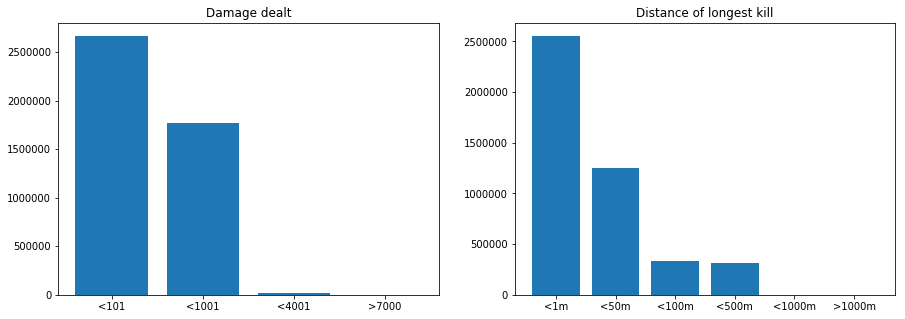

In [13]:
fig2, axs2 = plt.subplots(1, 2, figsize=(15,5))

# demage, longestKill 
axs2[0].bar(damage.category, damage.quantity)
axs2[0].set_xticklabels(damage.category)
axs2[0].set_title('Damage dealt')

axs2[1].bar(longestkills.category, longestkills.quantity)
axs2[1].set_xticklabels(longestkills.category)
axs2[1].set_title('Distance of longest kill')

plt.show()

#### Items and how to keep forward

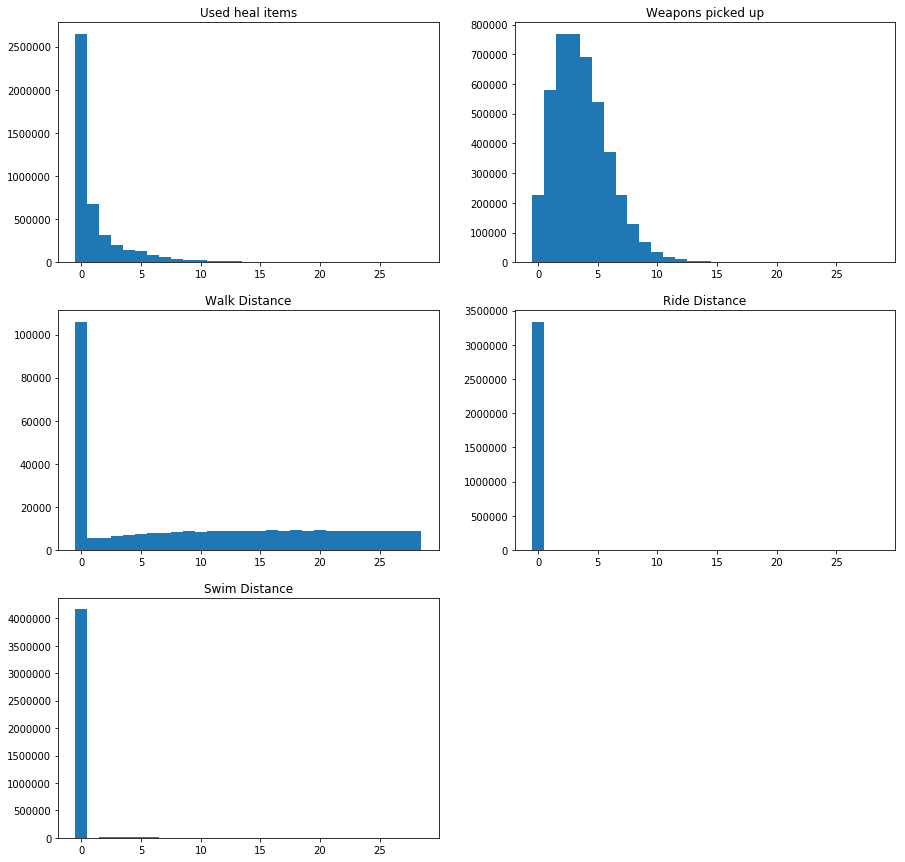

In [14]:
fig3, axs3 = plt.subplots(3, 2, figsize=(15,15))

#heal items used
axs3[0,0].hist(train.heals, 
              bins=range(0, 30), 
              align='left')
axs3[0,0].set_title('Used heal items')

#Number of weapons picked up
axs3[0,1].hist(train.weaponsAcquired, 
              bins=range(0, 30), 
              align='left')
axs3[0,1].set_title('Weapons picked up')


#walking
axs3[1,0].hist(train.walkDistance, 
              bins=range(0, 30), 
              align='left')
axs3[1,0].set_title('Walk Distance')

#riding
axs3[1,1].hist(train.rideDistance, 
              bins=range(0, 30), 
              align='left')
axs3[1,1].set_title('Ride Distance')

#swimming
axs3[2,0].hist(train.swimDistance, 
              bins=range(0, 30), 
              align='left')
axs3[2,0].set_title('Swim Distance')

axs3[2,1].remove()

plt.show()

This is interesting, couple of player who didn't walk. In case of the game it often means, the Player doesn't play the game.

#### WinPlace Situation

In [15]:
# drop some columns 
data_full = train.drop(train[["Id", "groupId", 
                              "matchId", 
                              "killPlace", 
                              "killPoints", 
                              "matchDuration", 
                              "rankPoints", 
                              "winPoints", 
                              "numGroups", 
                              "maxPlace"]], axis=1)

#### Correlations

In [21]:
# correlations just with active players
cor = data_full.corr()
cor.style.background_gradient().set_precision(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
assists,1,0.31,0.41,0.3,0.2,0.23,0.32,0.24,0.26,0.2,0.11,0.012,0.023,0.0061,0.058,0.29,0.24,0.3
boosts,0.31,1,0.52,0.36,0.33,0.54,0.5,0.41,0.42,0.25,0.33,0.035,0.11,0.013,0.087,0.64,0.41,0.63
damageDealt,0.41,0.52,1,0.74,0.61,0.34,0.89,0.7,0.56,0.26,0.14,0.052,0.037,0.015,0.081,0.4,0.35,0.44
DBNOs,0.3,0.36,0.74,1,0.47,0.27,0.71,0.65,0.45,0.3,0.1,0.036,0.017,0.069,0.06,0.28,0.22,0.28
headshotKills,0.2,0.33,0.61,0.47,1,0.2,0.67,0.51,0.45,0.15,0.076,0.013,0.029,0.0087,0.039,0.25,0.22,0.28
heals,0.23,0.54,0.34,0.27,0.2,1,0.31,0.27,0.26,0.24,0.3,0.025,0.08,0.035,0.063,0.43,0.31,0.43
kills,0.32,0.5,0.89,0.71,0.67,0.31,1,0.8,0.6,0.25,0.11,0.064,0.039,0.018,0.08,0.37,0.34,0.42
killStreaks,0.24,0.41,0.7,0.65,0.51,0.27,0.8,1,0.52,0.24,0.098,0.066,0.035,0.028,0.064,0.33,0.28,0.38
longestKill,0.26,0.42,0.56,0.45,0.45,0.26,0.6,0.52,1,0.17,0.19,0.025,0.053,0.0076,0.083,0.41,0.28,0.41
revives,0.2,0.25,0.26,0.3,0.15,0.24,0.25,0.24,0.17,1,0.11,0.0059,0.02,0.033,0.038,0.24,0.17,0.24


### Prepare Data <a id='prepare_data'></a>
[back](#toc)

In [ ]:
# just use active players and continue with this subset
data_active = pd.DataFrame(data_full.loc[(data_full['walkDistance'] > 0) | (data_full['rideDistance'] > 0)])

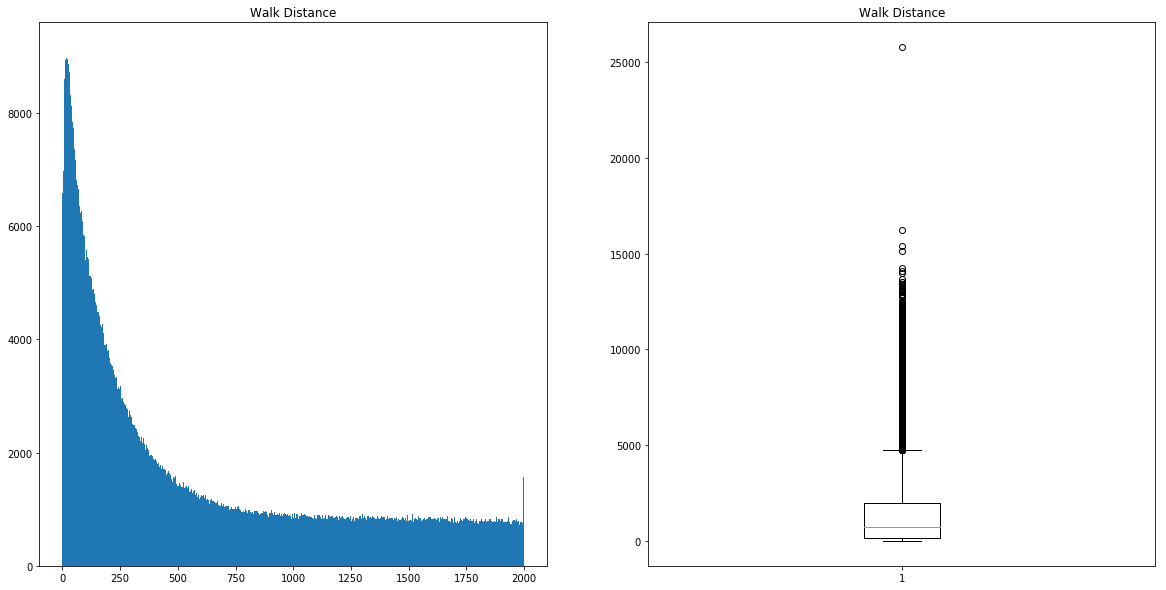

In [20]:
fig4, axs4 = plt.subplots(1, 2, figsize=(20,10))

#heal items used
#walking
axs4[0].hist(data_active.walkDistance, 
              bins=range(0, 2000), 
              align='left')
axs4[0].set_title('Walk Distance')

axs4[1].boxplot(data_active.walkDistance)
axs4[1].set_title('Walk Distance')

plt.show()

### Data Modelling <a id='data_modelling'></a>
[back](#toc)

### Evaluation <a id='evaluation'></a>
[back](#toc)